## Классификация сервисов яндекс при помощи модели LigthGBM

In [1]:
import pandas as pd
import sys  
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

print("Pandas version: ", pd.__version__)
print("lightgbm version: ", lgb.__version__)

Pandas version:  1.4.4
lightgbm version:  4.1.0


In [2]:
current_path = ''


df_final_filename = f'data/df_final_4serv.csv'

dfFinal = pd.read_csv(df_final_filename)

print('df_final: ', dfFinal.shape)

df_final:  (8375, 40)


In [3]:
dfFinal.dropna(axis=1,inplace=True)

In [4]:
dfFinal.columns.to_list()

['proto',
 'packets_count',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'diag_step_fiat',
 'diag_step_biat',
 'diag_steps',
 'tcp_syn_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktlen_1',
 'type']

In [5]:
y = dfFinal['type']
drop_col = ['type','proto','diag_step_fiat','diag_step_biat','diag_steps']
X  = dfFinal.drop(columns=drop_col)

#### Разобьем данные на подопытные и проверочные

In [6]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=None)

In [7]:
X_train.columns.to_list()

['packets_count',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'tcp_syn_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktlen_1']

## LightGBM

In [8]:
estimator = lgb.LGBMClassifier(objective='multiclass', 
                               boosting_type = 'gbdt', 
                               num_class = '3',
                               n_estimators = 1, 
                               num_trees = 1,
                               min_child_samples = 2,
                               class_weight = 'balanced')

##### ...со следующим набором гиперпараметров

In [9]:
parameters = {
    'max_depth': [3,4,5],
    'num_leaves': [10,20,30],
    'learning_rate': [0.1, 0.5, 1],
    'feature_fraction': [0.3, 0.5, 1],
}

In [10]:
grid_search = GridSearchCV(estimator, param_grid=parameters, scoring='accuracy', cv=3)

In [11]:
grid_search.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: featur

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1398
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightG

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightG

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tr

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1398
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightG

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No furth

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No furth

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No furth

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is s

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 wil

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1398
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 5862, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced',
                                      min_child_samples=2, n_estimators=1,
                                      num_class='3', num_trees=1,
                                      objective='multiclass'),
             param_grid={'feature_fraction': [0.3, 0.5, 1],
                         'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 4, 5],
                         'num_leaves': [10, 20, 30]},
             scoring='accuracy')

In [12]:
grid_search.best_estimator_

LGBMClassifier(class_weight='balanced', feature_fraction=1, max_depth=5,
               min_child_samples=2, n_estimators=1, num_class='3',
               num_leaves=20, num_trees=1, objective='multiclass')

In [13]:
predictions_LGB = grid_search.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1


In [14]:
print(grid_search.score(X_test, y_test))

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
0.9514524472741743


Feature importances:


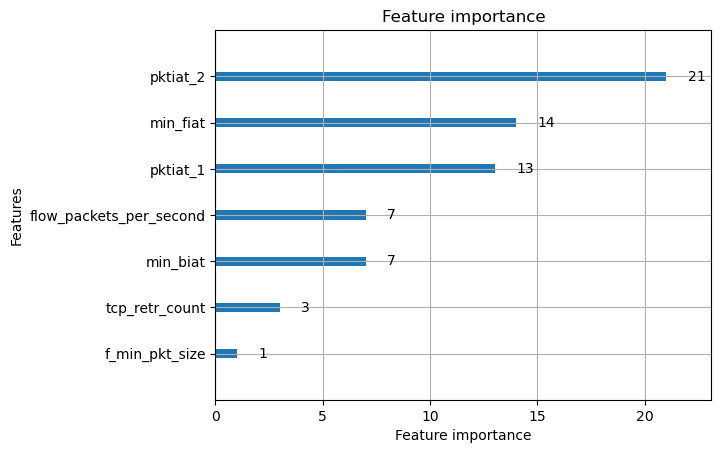


################################################################################
Confusion Matrix:


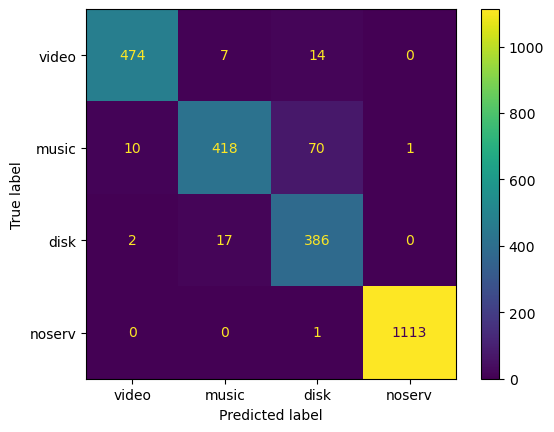


################################################################################
Classification Report:
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       495
           1       0.95      0.84      0.89       499
           2       0.82      0.95      0.88       405
           3       1.00      1.00      1.00      1114

    accuracy                           0.95      2513
   macro avg       0.93      0.94      0.93      2513
weighted avg       0.95      0.95      0.95      2513



In [15]:
feature_importances = np.zeros(X.shape[1])

print('Feature importances:')
lgb.plot_importance(grid_search.best_estimator_)
plt.show()

print('\n' + '#' * 80)
print('Confusion Matrix:')
    # functions.plot_confusion_matrix(valid_y, predictions_LGB.round(), "Analysis",
    #                                 index=["Std SSH", "Obf SSH"], columns=["Std SSH", "Obf SSH"])
    # metrics.confusion_matrix(model, valid_features, valid_y, cmap='Blues_r')
cm = confusion_matrix(y_test, predictions_LGB, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["video", "music", "disk",'noserv'])
disp.plot() #cmap='Blues_r')
plt.show()
    
print('\n' + '#' * 80)
print('Classification Report:')
print(metrics.classification_report(y_test, grid_search.predict(X_test)))
plt.show()
    


In [16]:
# Make sure to average feature importances! 
feature_importances = grid_search.best_estimator_.feature_importances_ / 2
feature_importances = pd.DataFrame({'feature': list(X.columns),
                                    'importance': feature_importances}
                                  ).sort_values('importance', ascending = False)

feature_importances.head(10)

,feature,importance
13,pktiat_2,10.5
1,min_fiat,7.0
12,pktiat_1,6.5
2,min_biat,3.5
3,flow_packets_per_second,3.5
10,tcp_retr_count,1.5
4,f_min_pkt_size,0.5
0,packets_count,0.0
5,b_min_pkt_size,0.0
6,tcp_syn_count,0.0


In [17]:
print(X_train.loc[1])
print(y_train.loc[1])

packets_count              10.000000
min_fiat                    0.000691
min_biat                    0.000010
flow_packets_per_second     1.000000
f_min_pkt_size             66.000000
b_min_pkt_size             66.000000
tcp_syn_count               0.000000
tcp_rst_count               0.000000
tcp_fin_count               0.000000
tcp_urg_count               0.000000
tcp_retr_count             10.000000
pktiat_0                    0.000000
pktiat_1                    0.007042
pktiat_2                    0.000323
pktlen_1                   66.000000
Name: 1, dtype: float64
1


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

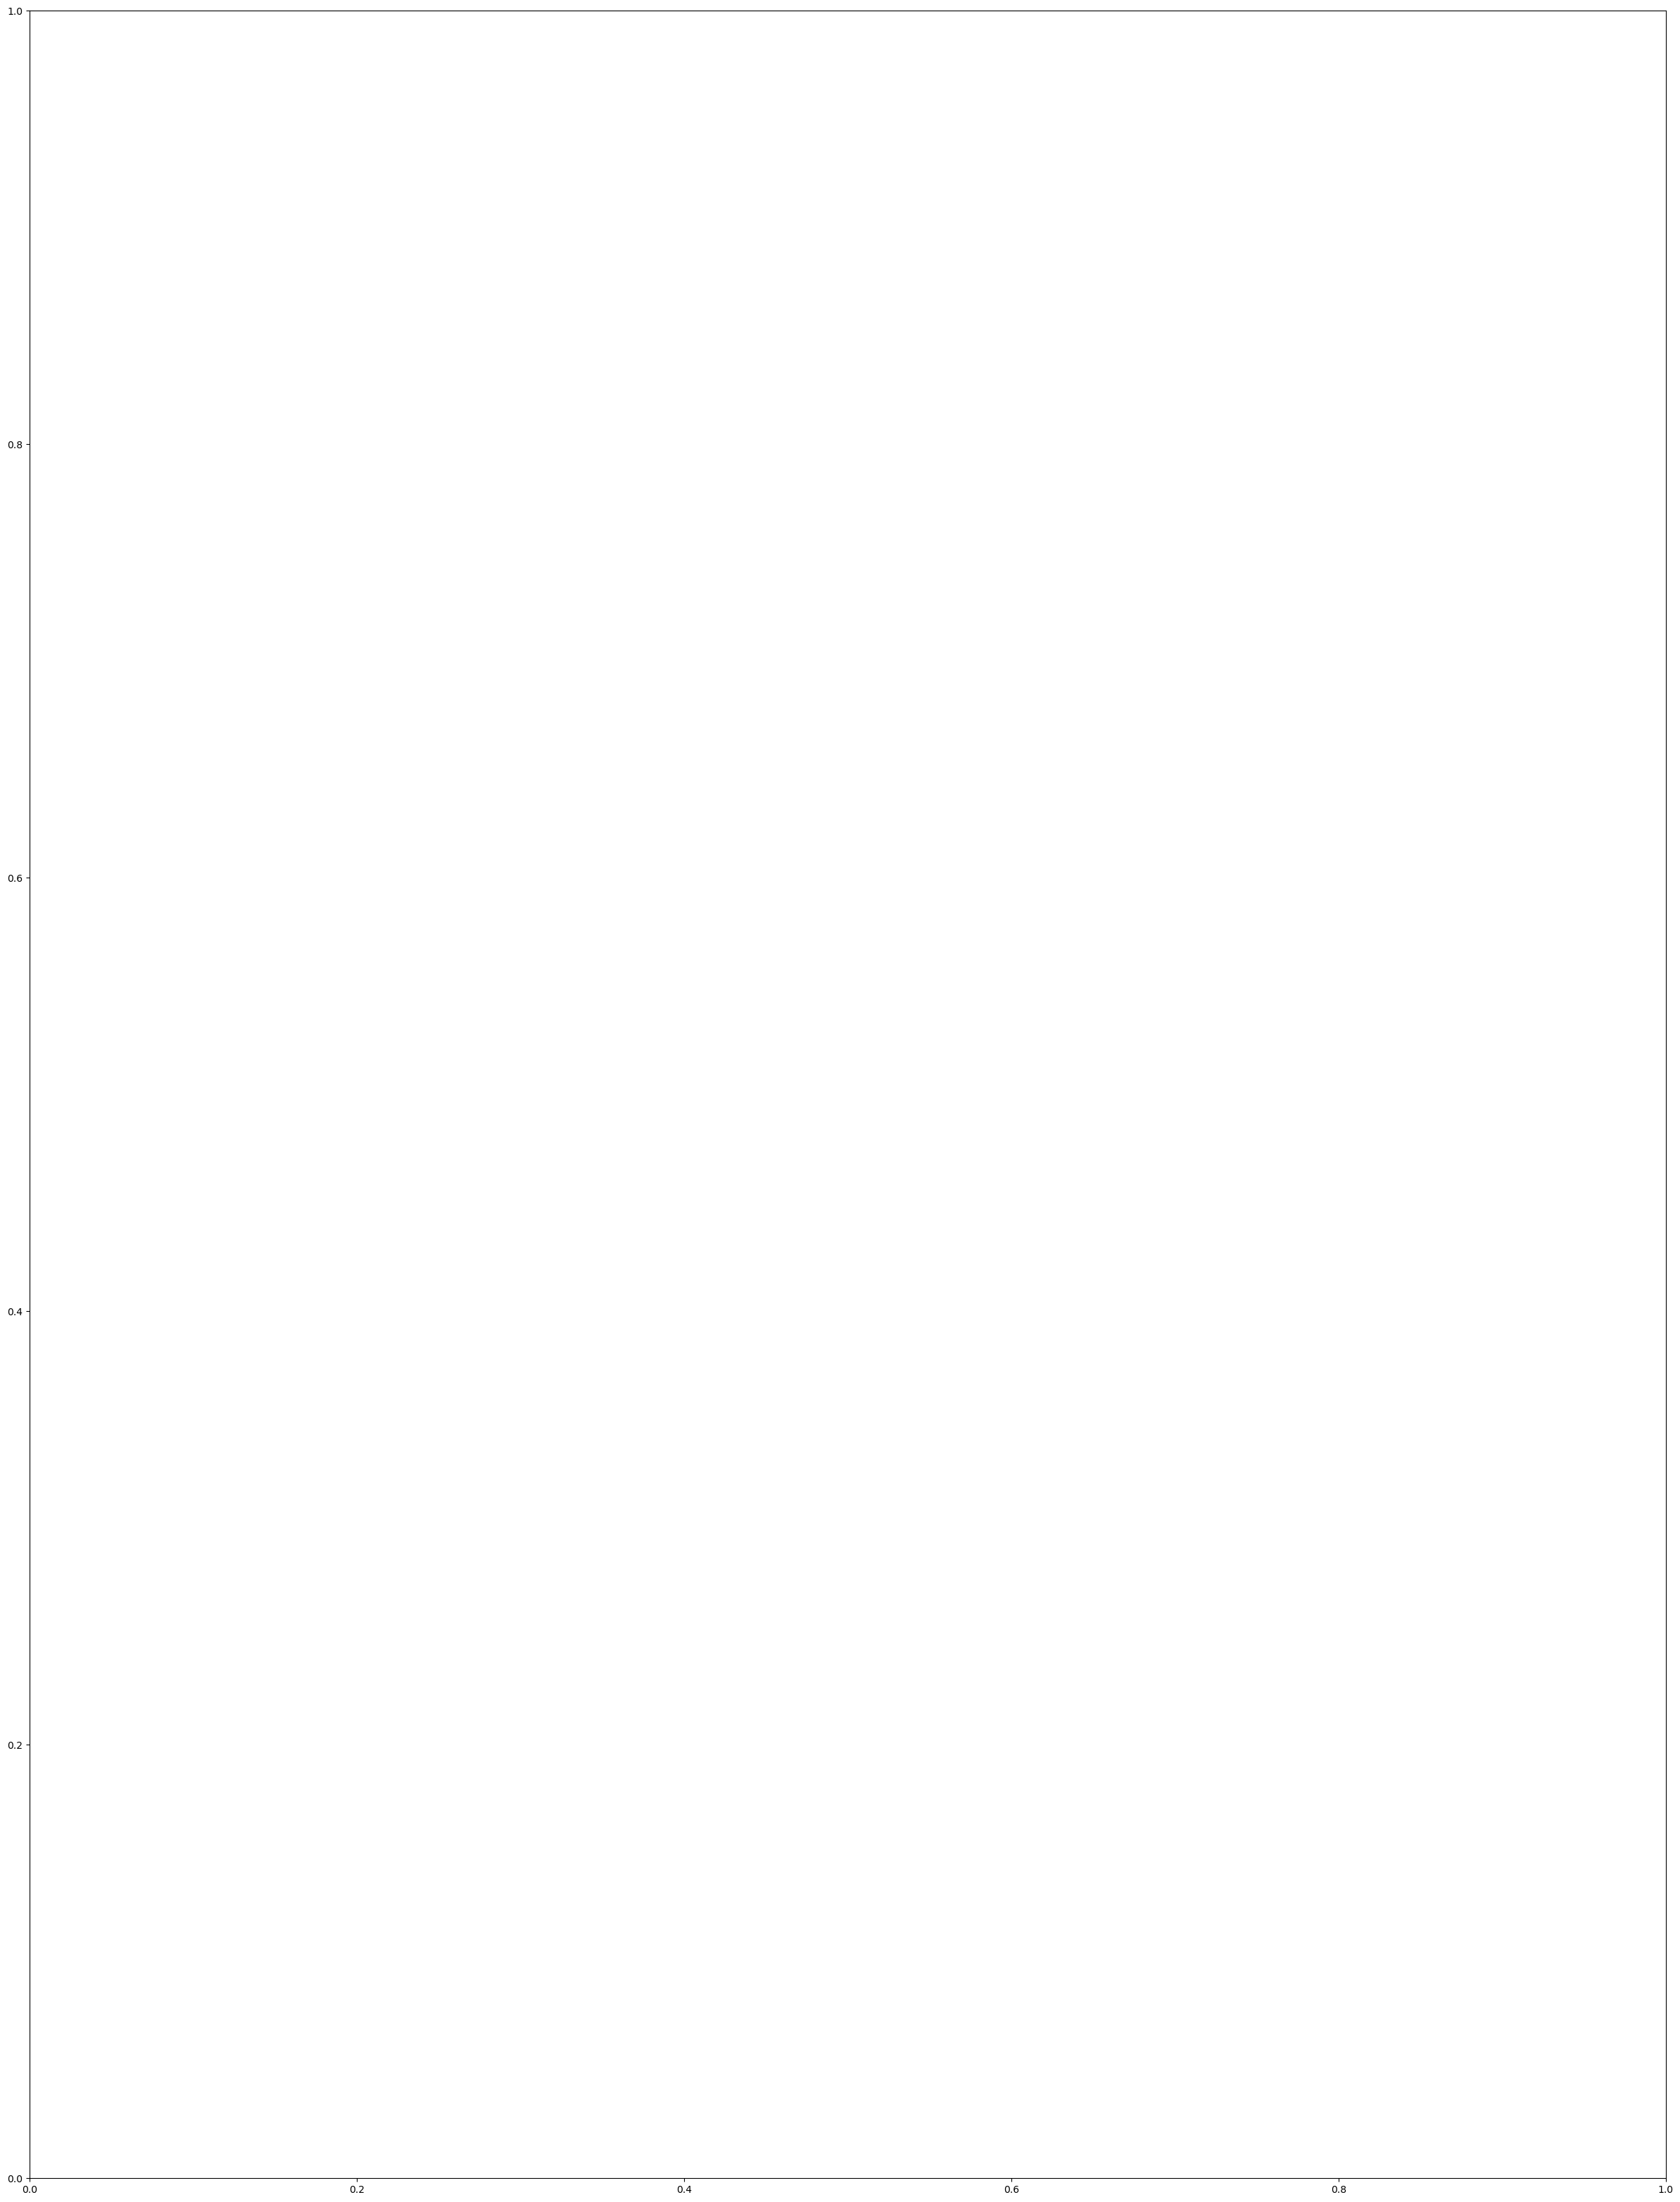

In [18]:
info = ['split_gain', 'internal_value', 'internal_count', 'internal_weight', 'leaf_count', 'leaf_weight', 'data_percentage']
lgb.plot_tree(grid_search.best_estimator_, tree_index=0, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

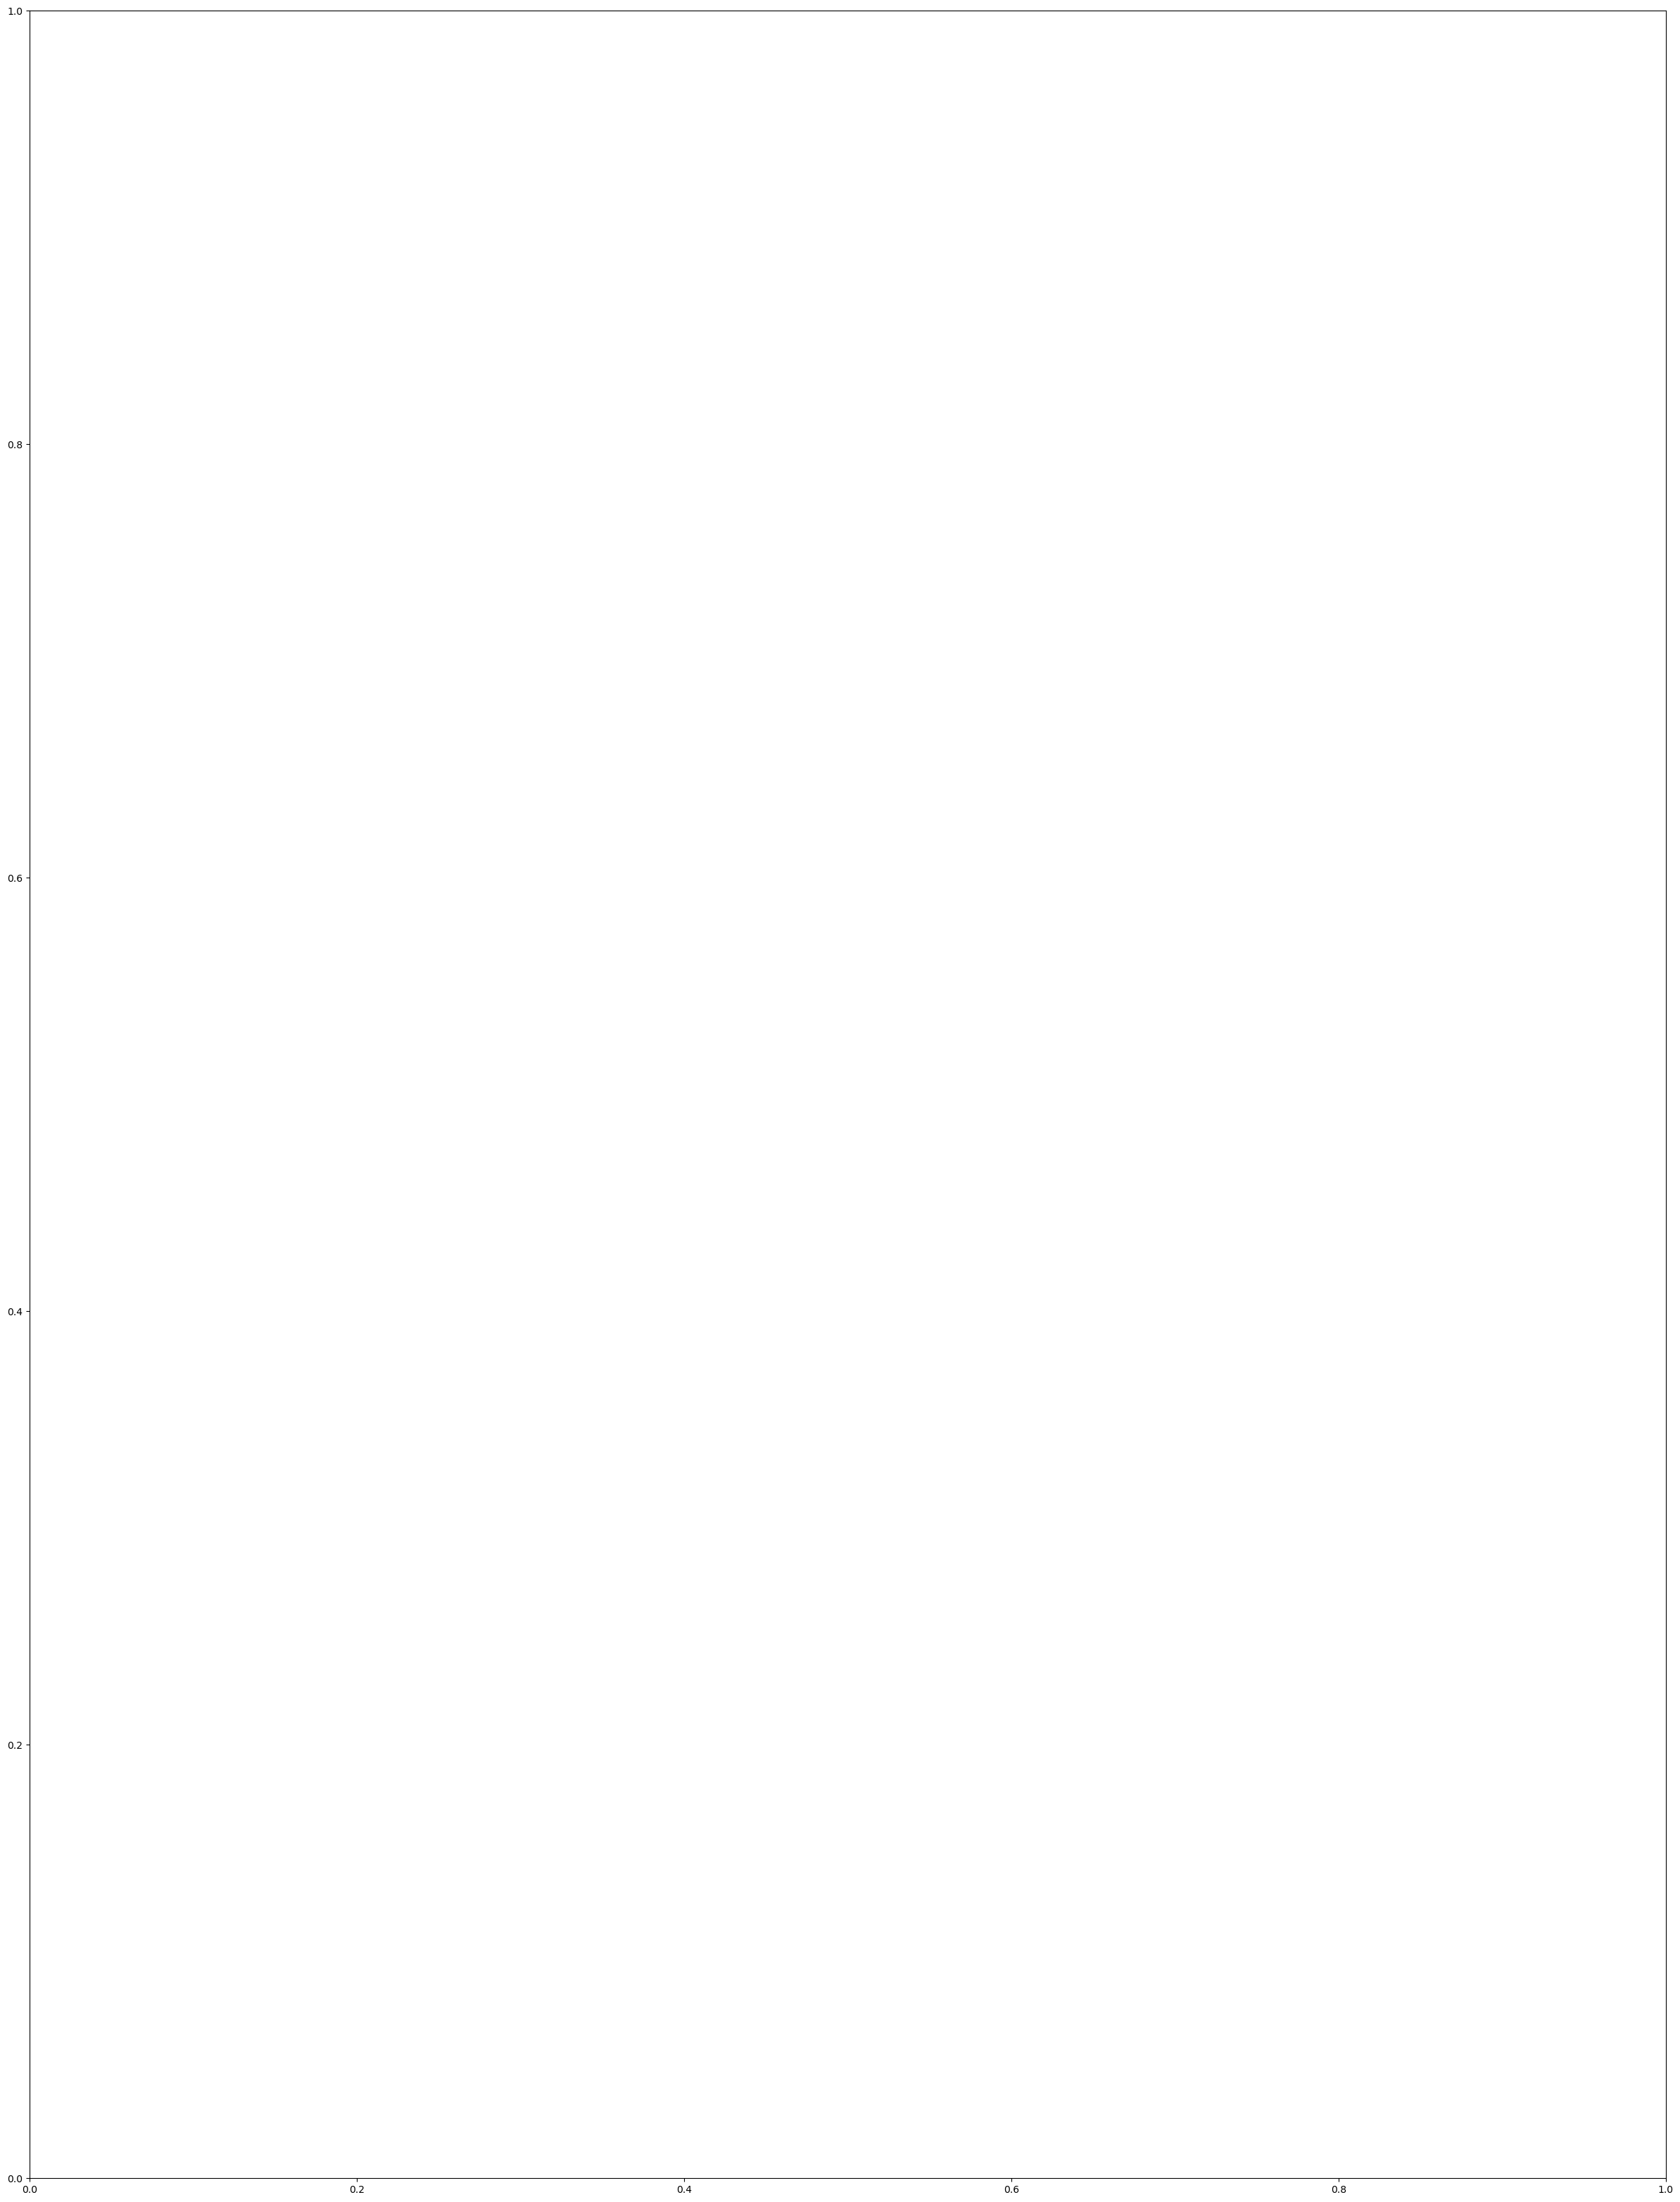

In [19]:

lgb.plot_tree(grid_search.best_estimator_, tree_index=1, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

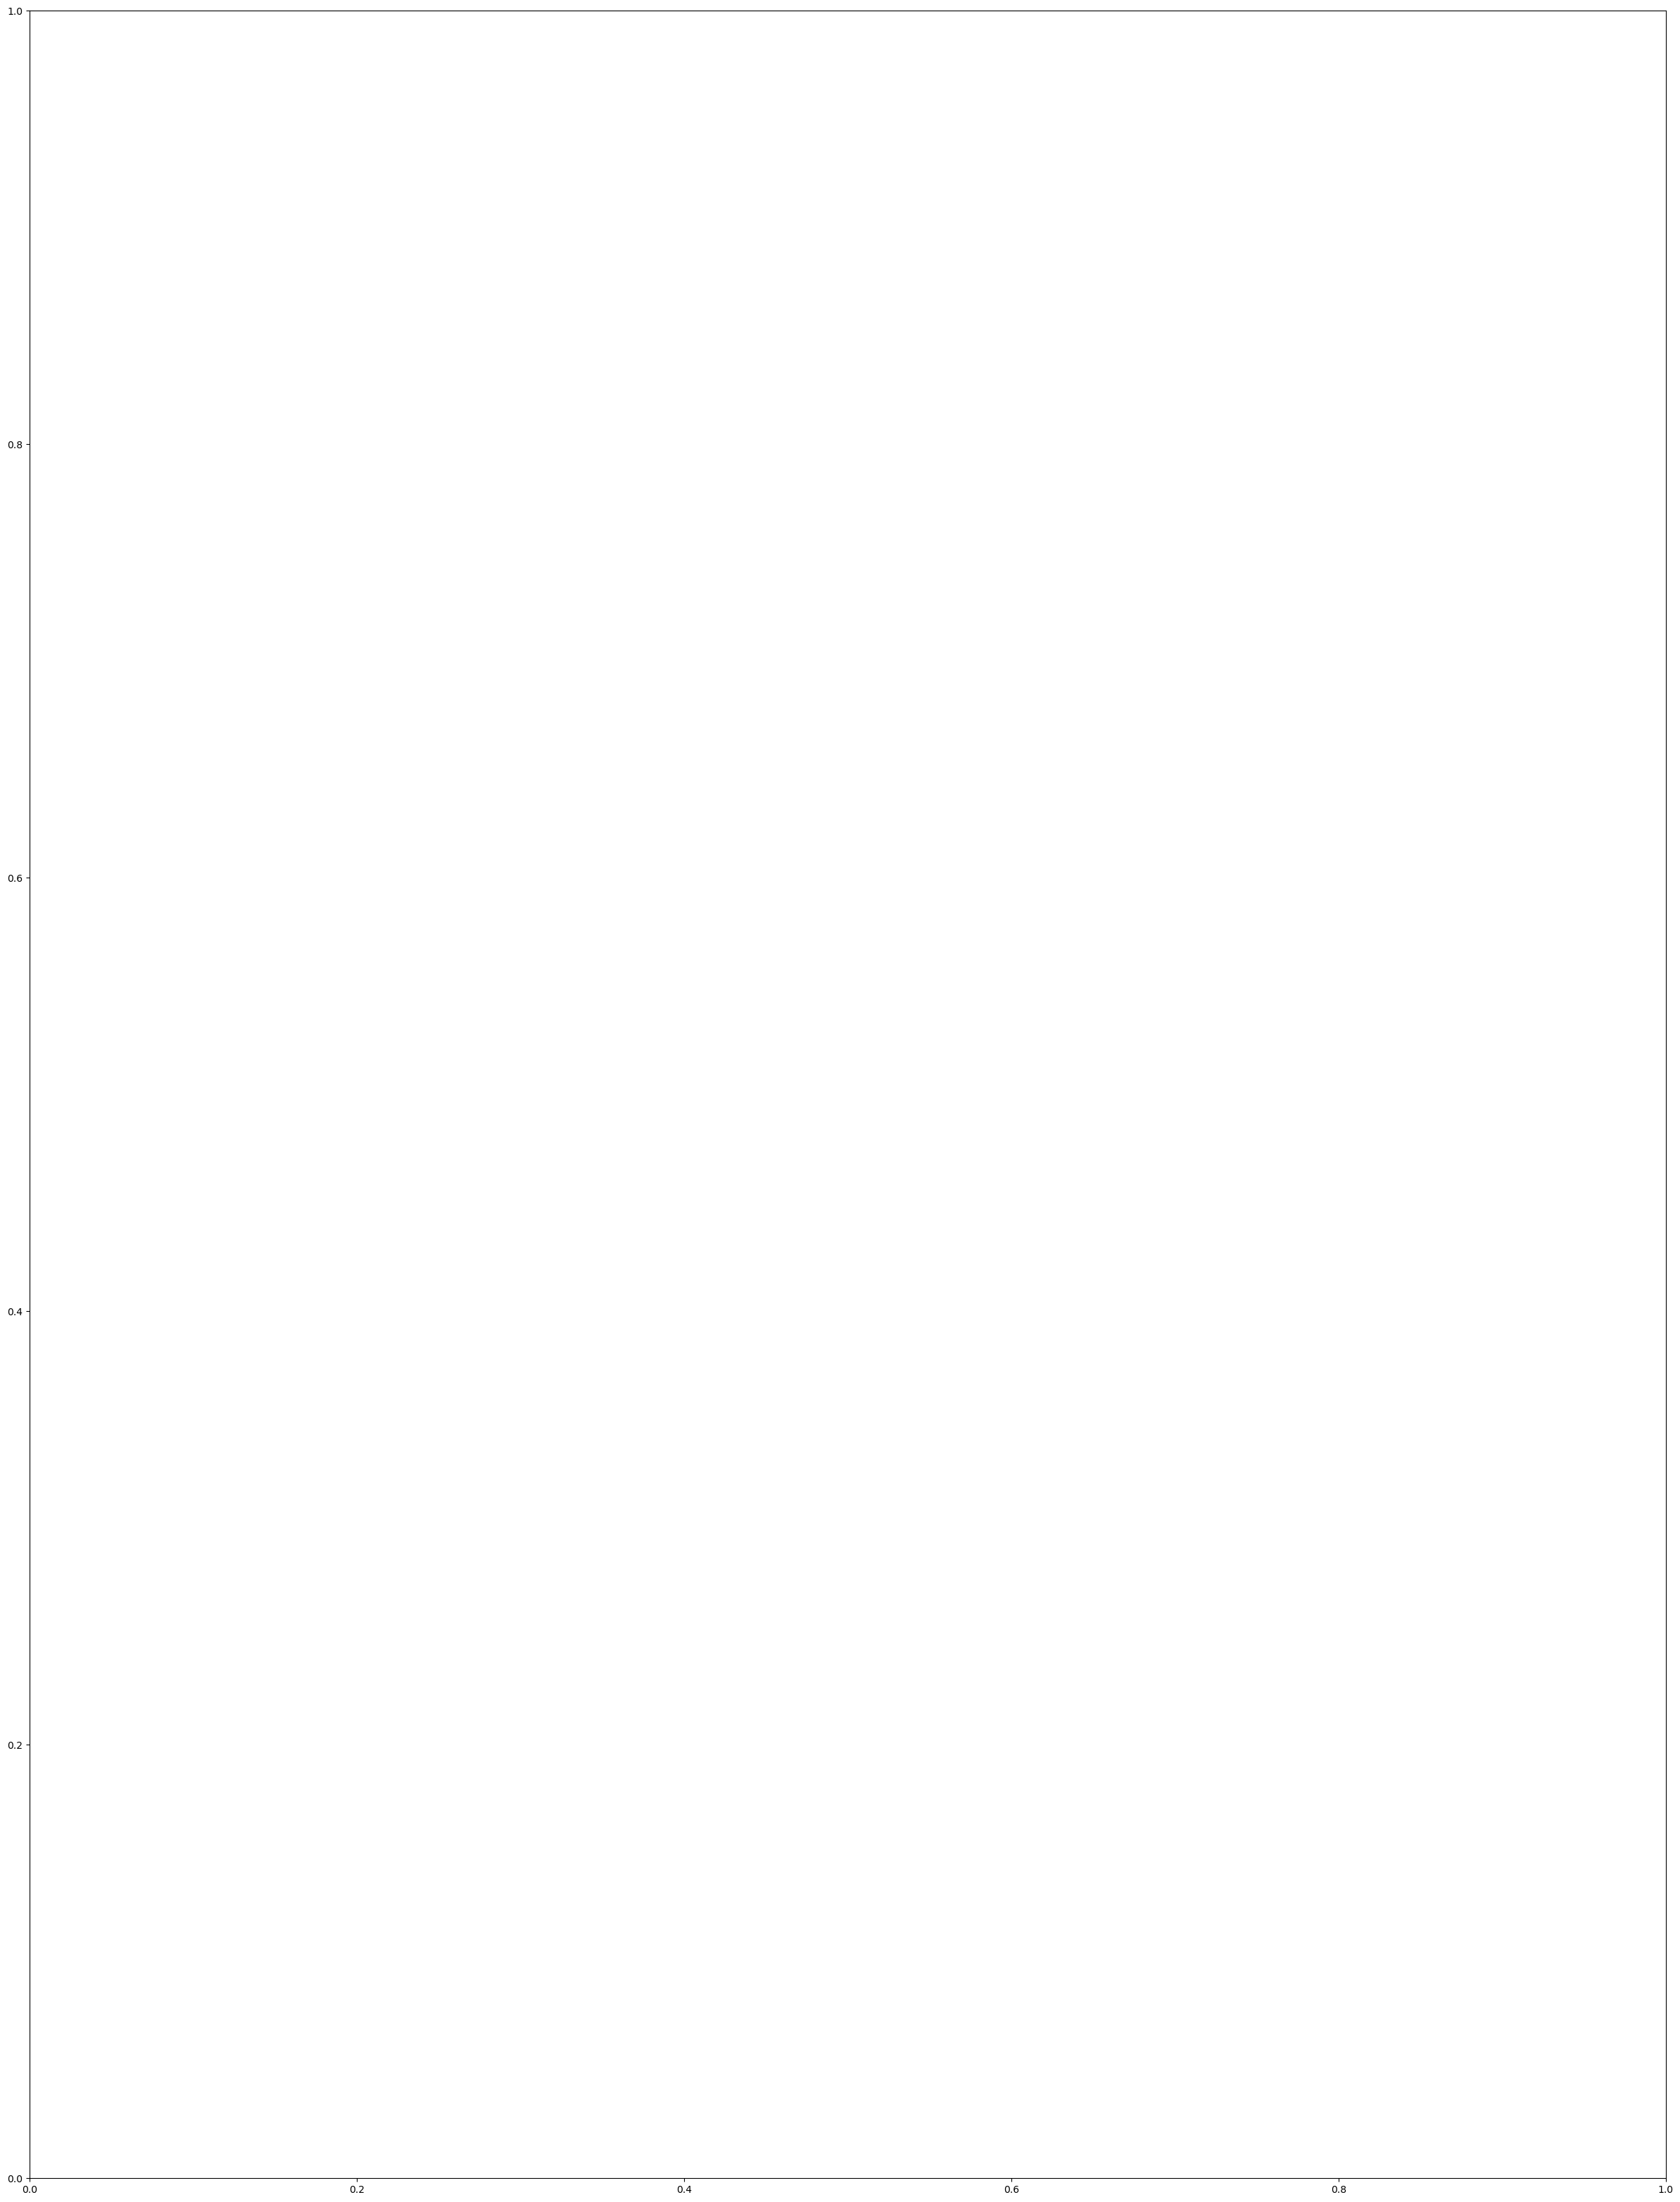

In [20]:
lgb.plot_tree(grid_search.best_estimator_, tree_index=2, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])

In [22]:
tree_df = grid_search.best_estimator_.booster_.trees_to_dataframe()
print(tree_df.tree_index.max())
grid_search.best_estimator_.booster_.trees_to_dataframe()

3


,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-S4,None,pktiat_1,3704.260010,0.004432,<=,left,None,-1.386290,0.000000,5862
1,0,2,0-S1,0-S2,0-S15,0-S0,flow_packets_per_second,384.343994,0.666800,<=,left,None,-1.120310,385.774000,1280
2,0,3,0-S2,0-S17,0-S3,0-S1,pktiat_2,9.343800,0.000410,<=,left,None,-1.092730,358.404000,1095
3,0,4,0-S17,0-S18,0-L18,0-S2,pktiat_2,0.466560,0.000023,<=,left,None,-1.087540,324.864000,993
4,0,5,0-S18,0-L0,0-L19,0-S17,min_fiat,2.201710,0.000330,<=,left,None,-1.123320,3.604880,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,3,4,3-L1,None,None,3-S4,None,NaN,NaN,None,None,None,-1.486294,189.102427,578
132,3,4,3-L5,None,None,3-S4,None,NaN,NaN,None,None,None,-1.486294,909.341617,2714
133,3,3,3-S2,3-L2,3-L3,3-S1,pktiat_1,3.217340,0.061464,<=,left,None,-1.368180,0.966333,4
134,3,4,3-L2,None,None,3-S2,None,NaN,NaN,None,None,None,-1.086294,0.285339,2


In [23]:
X_train.columns.to_list()

['packets_count',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'tcp_syn_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktlen_1']

In [24]:
import joblib

joblib.dump(grid_search.best_estimator_, f'{current_path}/model_lightgbm.pkl')

PermissionError: [Errno 13] Permission denied: '/model_lightgbm.pkl'

In [25]:
from sklearn.feature_selection import RFE
model_for_rfe = grid_search.best_estimator_

rfe = RFE(model_for_rfe, n_features_to_select=4, step=1)
X_train_rfe = X_train
y_train_rfe = y_train
fit = rfe.fit(X_train_rfe,y_train_rfe)


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 5862, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead 

In [26]:
print(("Число признаков: %d") %fit.n_features_)
print(("Отобранные признаки: %s") %fit.support_)
print(("Ранг признаков: %s") %fit.ranking_)

Число признаков: 4
Отобранные признаки: [False  True False  True False False False False False False False False
  True  True False]
Ранг признаков: [12  1  2  1  4 11 10  9  8  7  3  6  1  1  5]


In [27]:
feature_names_rfe = fit.get_feature_names_out()
print(feature_names_rfe)

['min_fiat' 'flow_packets_per_second' 'pktiat_1' 'pktiat_2']


In [28]:
print(fit.score(X_test,y_test))

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
0.9534421010744131


In [29]:
dfFinal_new = dfFinal[feature_names_rfe]
y = dfFinal['type']

X  = dfFinal_new

#### Разобьем данные на подопытные и проверочные

In [30]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=None)

In [31]:
X.shape

(8375, 4)

## LightGBM

In [32]:
estimator = lgb.LGBMClassifier(objective='multiclass', 
                               boosting_type = 'gbdt', 
                               num_class = '3',
                               n_estimators = 100, 
                               class_weight = 'balanced')

##### ...со следующим набором гиперпараметров

In [33]:
parameters = {
    'max_depth': [4],
    'num_leaves': [20],
    'min_child_samples': [19],
    'min_child_weight': [0.002],
    'feature_fraction': [0.6],
}

In [34]:
grid_search = GridSearchCV(estimator, param_grid=parameters, scoring='accuracy', cv=3)

In [35]:
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 4
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced', num_class='3',
                                      objective='multiclass'),
             param_grid={'feature_fraction': [0.6], 'max_depth': [4],
                         'min_child_samples': [19], 'min_child_weight': [0.002],
                         'num_leaves': [20]},
             scoring='accuracy')

In [36]:
grid_search.best_estimator_

LGBMClassifier(class_weight='balanced', feature_fraction=0.6, max_depth=4,
               min_child_samples=19, min_child_weight=0.002, num_class='3',
               num_leaves=20, objective='multiclass')

In [37]:
predictions_LGB = grid_search.predict(X_test)
print(grid_search.score(X_test, y_test))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
0.9538400318344608


Feature importances:


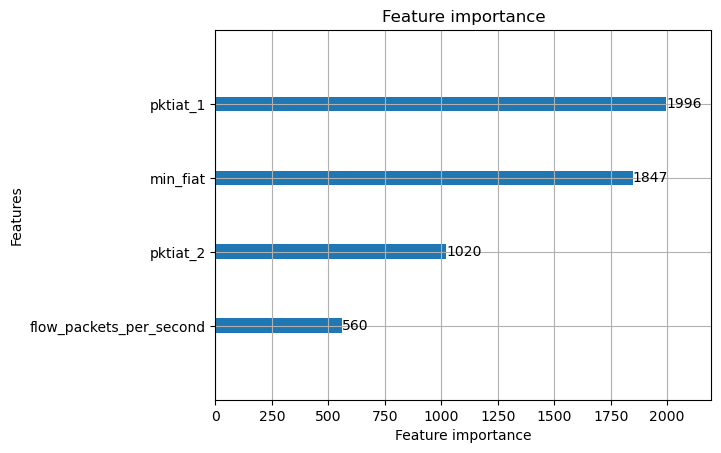


################################################################################
Confusion Matrix:


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

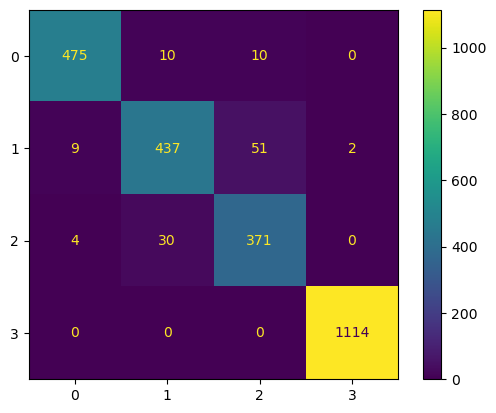

In [38]:
feature_importances = np.zeros(X.shape[1])

print('Feature importances:')
lgb.plot_importance(grid_search.best_estimator_)
plt.show()

print('\n' + '#' * 80)
print('Confusion Matrix:')
    # functions.plot_confusion_matrix(valid_y, predictions_LGB.round(), "Analysis",
    #                                 index=["Std SSH", "Obf SSH"], columns=["Std SSH", "Obf SSH"])
    # metrics.confusion_matrix(model, valid_features, valid_y, cmap='Blues_r')
cm = confusion_matrix(y_test, predictions_LGB, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["video", "music", "disk"])
disp.plot() #cmap='Blues_r')
plt.show()
    
print('\n' + '#' * 80)
print('Classification Report:')
print(metrics.classification_report(y_test, grid_search.predict(X_test)))
plt.show()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

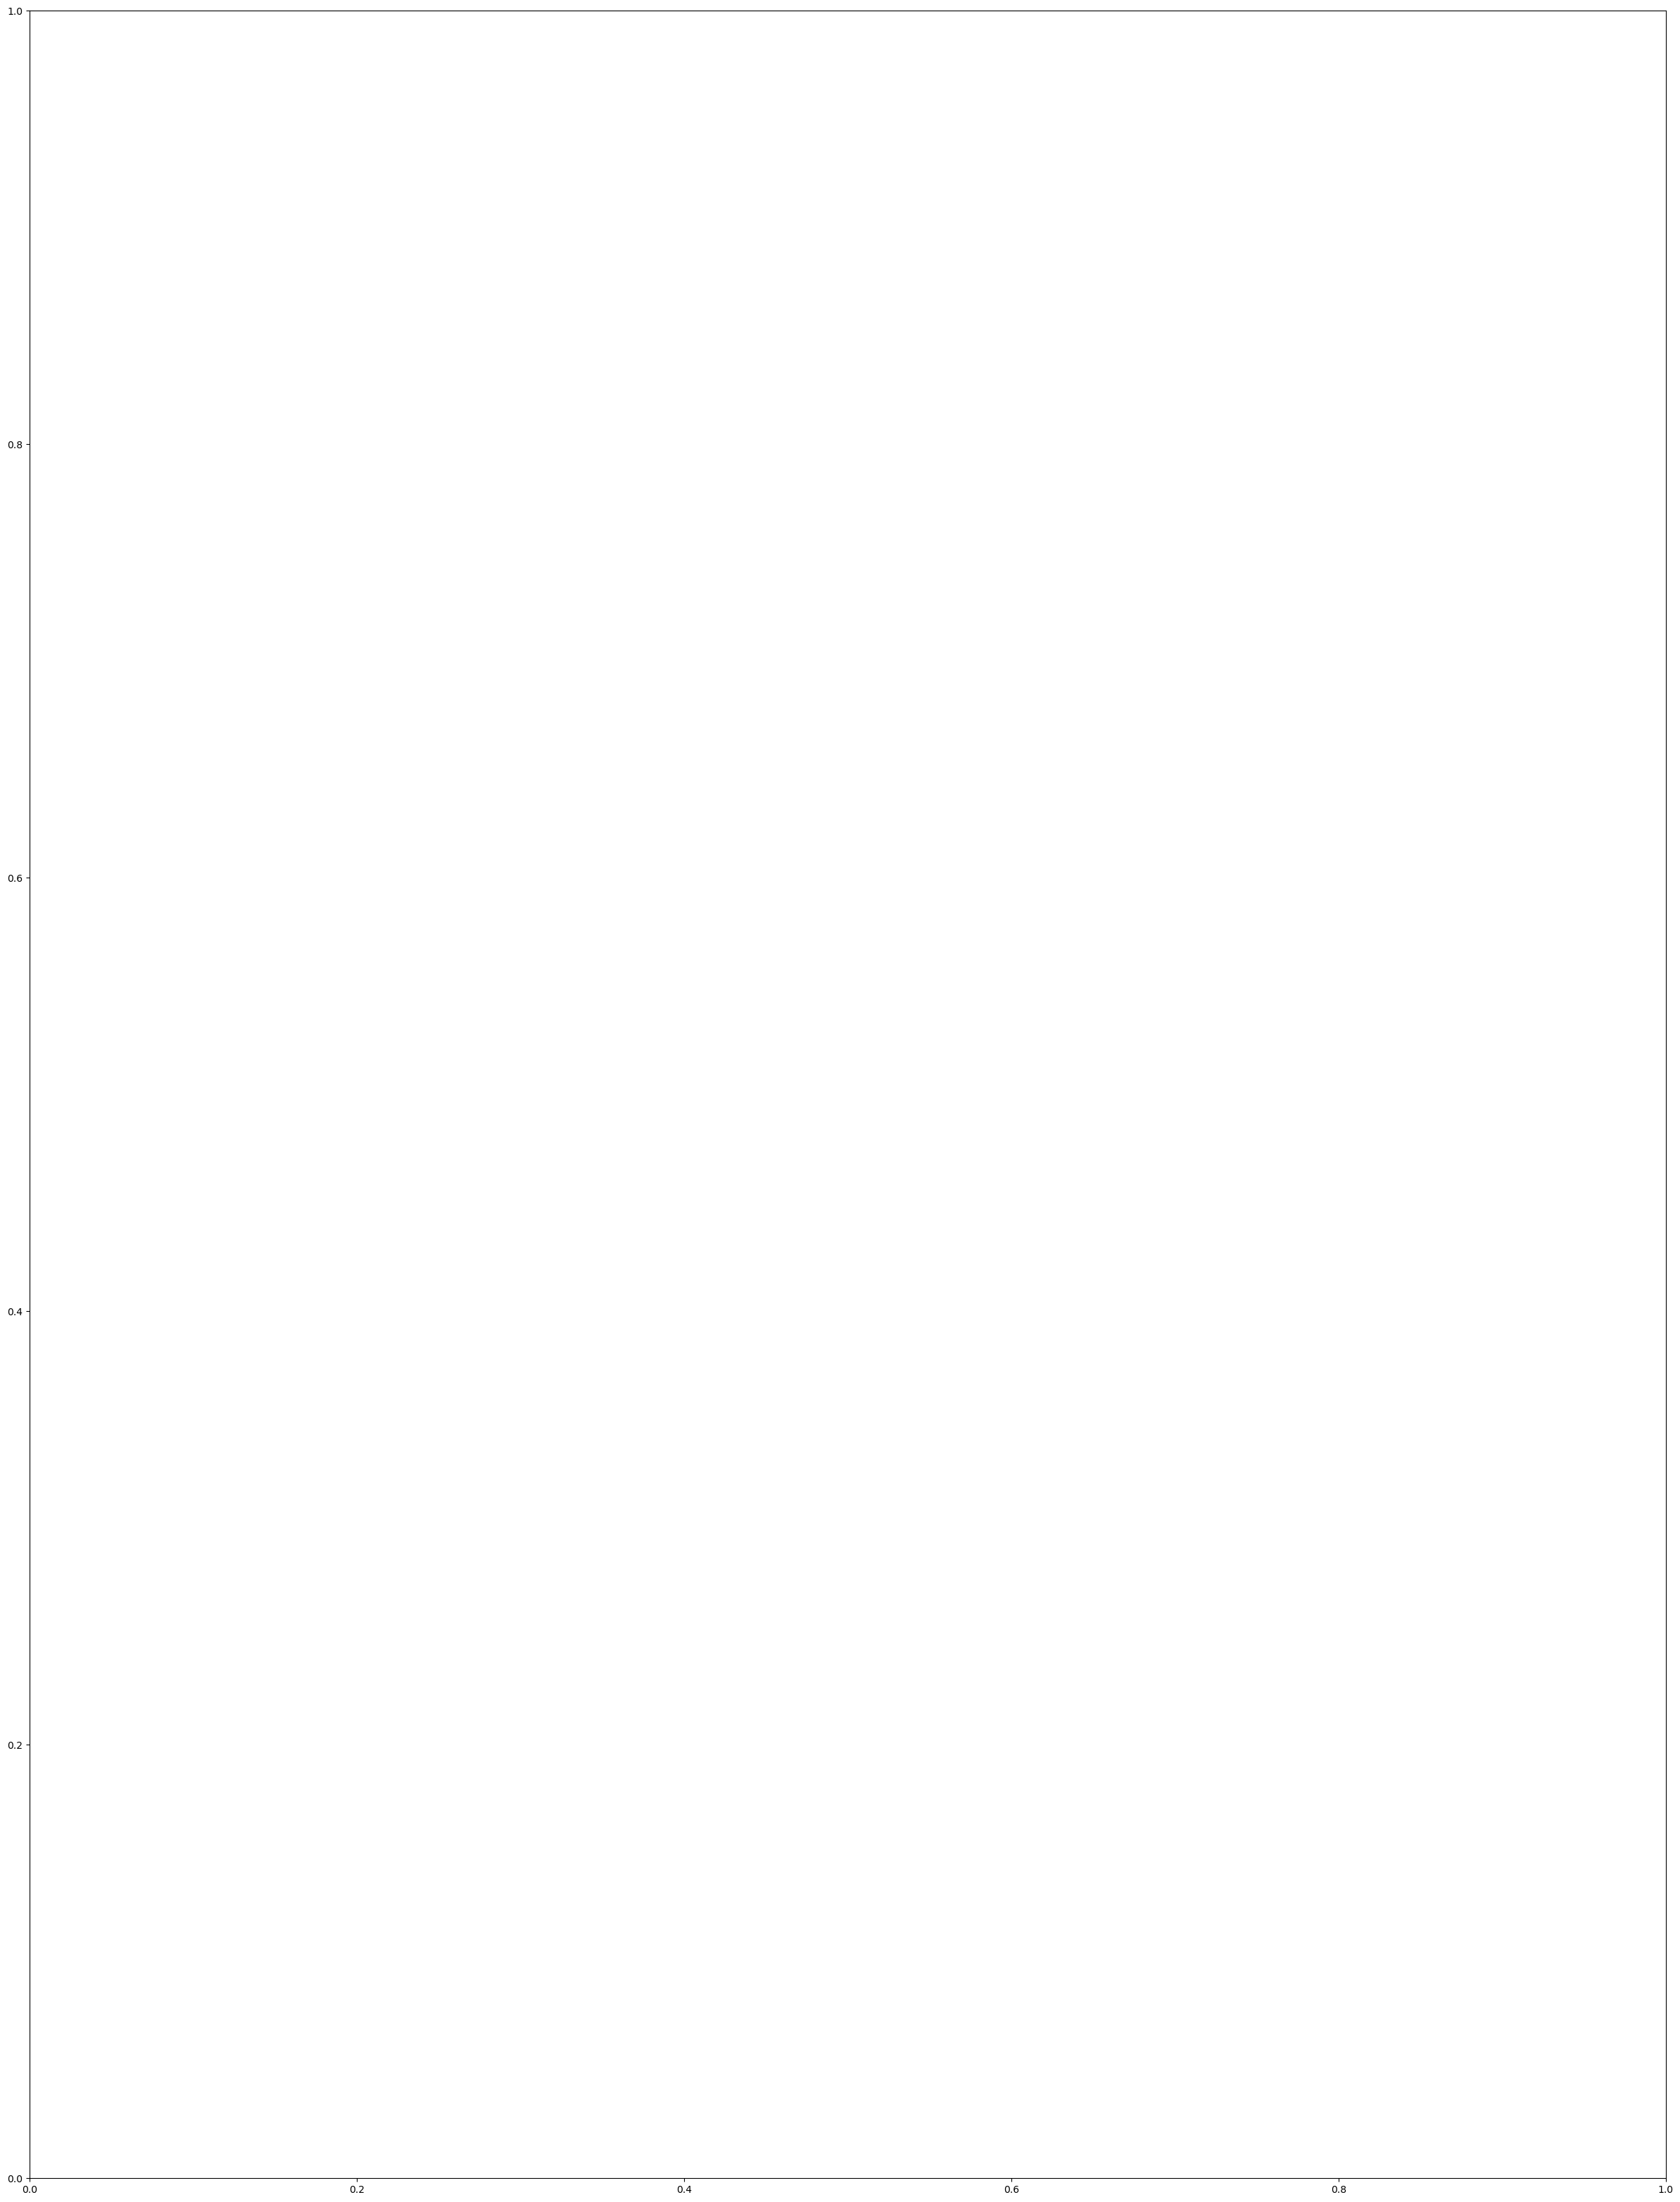

In [39]:
lgb.plot_tree(grid_search.best_estimator_, figsize=(30,40), show_info=['data_percentage',])

## Final test on X

In [40]:
predicted_X = grid_search.predict(X)
print('LGB accuracy:', accuracy_score(y, predicted_X))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
LGB accuracy: 0.9697910447761194


## Save model

In [41]:
import joblib

joblib.dump(grid_search.best_estimator_, f'{current_path}/model_lightgbm_2.pkl')

PermissionError: [Errno 13] Permission denied: '/model_lightgbm_2.pkl'